ANKUSH HORE (ahore2)

NIHIT HINDLEKAR (nhindl2)

ROHAN LIMAYE (rohansl2)

**Task 0: Getting Started**

**1. In the context of statistical analysis, why do biologists need multiple cells to identify
genes with significantly altered expression?**

Due to tumour heterogeneity (https://en.wikipedia.org/wiki/Tumour_heterogeneity), we expect different cancer cells to react differently to a specific drug. Therefore, we expect a particular drug to affect the gene expressions of only a subpopulation of the cancer cells. Moreover, gene expression is quantitative and its level is different for different cells. Hence, we require multiple cells to identify the genes with statistically significant altered expression.

LOADING THE DATA:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
BayesInferenceBase = pd.read_csv("BayesInferenceBase.csv")
BayesInferenceBase.head()

,CellName,time,temp
0,BaselineCell_1,short,cool
1,BaselineCell_2,short,cool
2,BaselineCell_3,short,warm
3,BaselineCell_4,short,hot
4,BaselineCell_5,short,hot


In [3]:
BayesInferenceMetf = pd.read_csv("BayesInferenceMetf.csv")
BayesInferenceMetf.head()

,CellName,time,temp
0,Metformin_1,short,cool
1,Metformin_2,short,cold
2,Metformin_3,short,warm
3,Metformin_4,short,cool
4,Metformin_5,short,cold


In [4]:
GeneExpression_Baseline = pd.read_csv("GeneExpression_Baseline.csv")
GeneExpression_Baseline.head()

,GeneID,Chr,Start,Stop,CodingLength,BaselineCell_1,BaselineCell_2,BaselineCell_3,BaselineCell_4,BaselineCell_5,...,BaselineCell_183,BaselineCell_184,BaselineCell_185,BaselineCell_186,BaselineCell_187,BaselineCell_188,BaselineCell_189,BaselineCell_190,BaselineCell_191,BaselineCell_192
0,DDX11L1,chr1,11874,14408,1651,61,47,72,77,75,...,39,34,28,25,30,29,92,26,43,33
1,WASH7P,chr1,14362,29370,1769,72,60,79,80,81,...,26,26,19,26,19,22,96,33,32,44
2,FAM138A,chr1,34611,36081,1130,159,182,152,133,147,...,59,64,44,51,47,54,145,57,65,59
3,FAM138F,chr1,34611,36081,1130,64,54,88,92,63,...,24,31,23,19,25,33,86,45,25,20
4,OR4F5,chr1,69091,70008,918,61,57,63,61,69,...,40,41,17,25,27,27,99,31,32,29


In [5]:
GeneExpression_Metformin = pd.read_csv("GeneExpression_Metformin.csv")
GeneExpression_Metformin.head()

,GeneID,Chr,Start,Stop,CodingLength,MetforminCell_1,MetforminCell_2,MetforminCell_3,MetforminCell_4,MetforminCell_5,...,MetforminCell_183,MetforminCell_184,MetforminCell_185,MetforminCell_186,MetforminCell_187,MetforminCell_188,MetforminCell_189,MetforminCell_190,MetforminCell_191,MetforminCell_192
0,DDX11L1,chr1,11874,14408,1651,40,75,37,107,100,...,83,111,14,31,102,67,38,93,35,45
1,WASH7P,chr1,14362,29370,1769,84,75,57,74,71,...,67,83,19,31,112,70,32,76,39,38
2,FAM138A,chr1,34611,36081,1130,142,108,74,168,148,...,107,111,24,76,176,131,74,153,59,93
3,FAM138F,chr1,34611,36081,1130,75,61,45,97,54,...,61,104,17,26,86,81,37,86,39,38
4,OR4F5,chr1,69091,70008,918,84,86,39,94,74,...,55,61,29,23,57,87,45,96,59,48


In [6]:
QualityControl = pd.read_csv("QualityControl.csv")
QualityControl.head()

,temp,time,viab,qual
0,cool,short,high,good
1,hot,short,low,good
2,warm,short,high,good
3,cool,short,high,bad
4,cool,short,high,good


**2. How many cells were sequenced?**

In [7]:
GeneExpression_Baseline.shape[1] - 5 #As there are 5 initial gene-specific fields

192

**3. How many genes were sequenced?**

In [8]:
GeneExpression_Baseline["GeneID"].nunique()

23346

**4. Are genes equally distributed across chromosomes?**

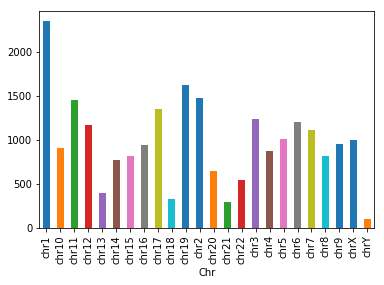

In [9]:
z=GeneExpression_Metformin.groupby("Chr")["GeneID"].nunique()
z.plot.bar()
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = 12, 8
plt.show()

We see that the genes are not equally distributed across chromosomes.

**5. Plot the distribution of coding length.**

/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


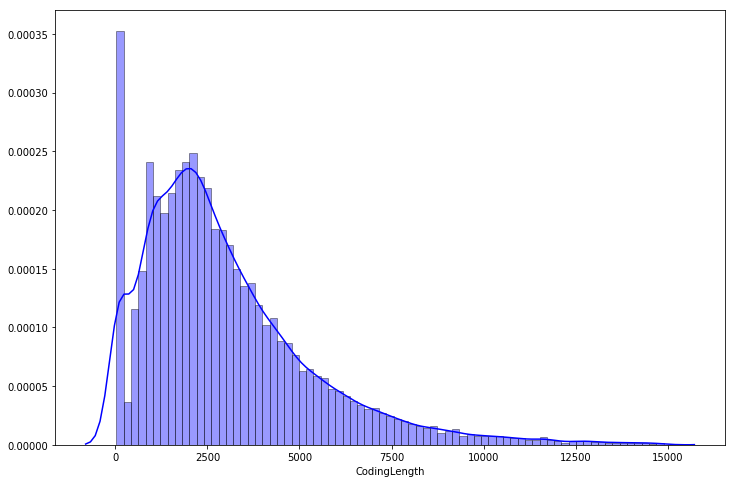

In [10]:
coding_length = GeneExpression_Metformin[GeneExpression_Metformin.CodingLength < 15000]
sns.distplot(coding_length["CodingLength"], hist=True, kde=True, 
             bins=75, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.rcParams["figure.figsize"] = 8, 12

**Task 1: Data Cleaning and Visual Inspection**

**1. Bayesian Network for Quality Control**

Not all cells used in the experiment yield high-quality data. Identifying and removing potentially problematic cells is critical for downstream analysis. In scRNA-seq, factors such as machine failures, batch effects might impact the quality of the data. For the purpose of this project, we will limit the factors to the ones described below.

If one observes that data quality is related to temperature, time, etc., one can identify the poor quality cells using a Bayesian approach. Consider the following Bayesian Network for quality control: (figure in pdf)

**a. Give the factorization of the joint probability distribution.**

P(Q, V, Te, Ti) = P(Q | V, Ti)* P(V | Te, Ti)* P(Te)* P(Ti)

**b. Count the number of parameters needed to define the conditional probability distribution
of the Bayesian Network for quality control.**

31

**c. Show the conditional probability tables P(Quality|Viability, Time), P(Viability|Temperature, Time), P(Temperature), P(Time) for the above network. Training data is provided in ​QualityControl.csv​.**

In [11]:
CPT_Q_V_Ti_header = {'V':[], 'Ti':[], 'Q_Good':[], 'Q_Bad':[]}
CPT_Q_V_Ti = pd.DataFrame(CPT_Q_V_Ti_header)
CPT_V_Te_Ti_header = {'Te':[], 'Ti':[], 'V_High':[], 'V_Low':[]}
CPT_V_Te_Ti = pd.DataFrame(CPT_V_Te_Ti_header)
CPT_Te_header = {'cold':[], 'cool':[], 'warm':[], 'hot':[]}
CPT_Te = pd.DataFrame(CPT_Te_header)
CPT_Ti_header = {'short':[], 'long':[]}
CPT_Ti = pd.DataFrame(CPT_Ti_header)

In [12]:
distinct_Ti = QualityControl["time"].unique()
distinct_Te = QualityControl["temp"].unique()
distinct_V = QualityControl["viab"].unique()

In [13]:
distinct_V_Ti = np.transpose([np.tile(distinct_V, len(distinct_Ti)), np.repeat(distinct_Ti, len(distinct_V))])
distinct_V_Ti

array([['high', 'short'],
       ['low', 'short'],
       ['high', 'long'],
       ['low', 'long']], dtype=object)

In [14]:
location = 0
for each in distinct_V_Ti:
    count_total = 0
    count_good = 0
    for each_q in QualityControl.iterrows():
        if each_q[1][1] == each[1] and each_q[1][2] == each[0]:
            count_total += 1
        if each_q[1][1] == each[1] and each_q[1][2] == each[0] and each_q[1][3] == 'good':
            count_good += 1
    good_prob = count_good / float(count_total)
    bad_prob = 1 - good_prob
    CPT_Q_V_Ti.loc[location] = [each[0], each[1], good_prob, bad_prob]
    location += 1

In [15]:
CPT_Q_V_Ti

,V,Ti,Q_Good,Q_Bad
0,high,short,0.894852,0.105148
1,low,short,0.517321,0.482679
2,high,long,0.522293,0.477707
3,low,long,0.047619,0.952381


In [16]:
distinct_Te_Ti = np.transpose([np.tile(distinct_Te, len(distinct_Ti)), np.repeat(distinct_Ti, len(distinct_Te))])
distinct_Te_Ti

array([['cool', 'short'],
       ['hot', 'short'],
       ['warm', 'short'],
       ['cold', 'short'],
       ['cool', 'long'],
       ['hot', 'long'],
       ['warm', 'long'],
       ['cold', 'long']], dtype=object)

In [17]:
location = 0
for each in distinct_Te_Ti:
    count_total = 0
    count_good = 0
    for each_q in QualityControl.iterrows():
        if each_q[1][1] == each[1] and each_q[1][0] == each[0]:
            count_total += 1
        if each_q[1][1] == each[1] and each_q[1][0] == each[0] and each_q[1][2] == 'high':
            count_good += 1
    high_prob = count_good / float(count_total)
    low_prob = 1 - high_prob
    CPT_V_Te_Ti.loc[location] = [each[0], each[1], high_prob, low_prob]
    location += 1

In [18]:
CPT_V_Te_Ti

,Te,Ti,V_High,V_Low
0,cool,short,0.948268,0.051732
1,hot,short,0.212815,0.787185
2,warm,short,0.906657,0.093343
3,cold,short,0.415966,0.584034
4,cool,long,0.792829,0.207171
5,hot,long,0.071429,0.928571
6,warm,long,0.707143,0.292857
7,cold,long,0.265306,0.734694


In [19]:
QualityControl.head()

,temp,time,viab,qual
0,cool,short,high,good
1,hot,short,low,good
2,warm,short,high,good
3,cool,short,high,bad
4,cool,short,high,good


In [20]:
#CPT_Te_header = {'cold':[], 'cool':[], 'warm':[], 'hot':[]}
count_cold = 0
count_cool = 0
count_warm = 0
count_hot = 0
total = 0
for each_q in QualityControl.iterrows():
    if each_q[1][0] == 'cold':
        count_cold += 1
    if each_q[1][0] == 'cool':
        count_cool += 1
    if each_q[1][0] == 'warm':
        count_warm += 1
    if each_q[1][0] == 'hot':
        count_hot += 1
    total += 1
CPT_Te.loc[0] = [count_cold/float(total), count_cool/float(total), count_warm/float(total), count_hot/float(total)]
CPT_Te

,cold,cool,warm,hot
0,0.105,0.4948,0.3044,0.0958


In [21]:
#CPT_Ti_header = {'short':[], 'long':[]}
count_short = 0
count_long = 0
total = 0
for each_q in QualityControl.iterrows():
    if each_q[1][1] == 'short':
        count_short += 1
    if each_q[1][1] == 'long':
        count_long += 1
    total += 1
CPT_Ti.loc[0] = [count_short/float(total), count_long/float(total)]
CPT_Ti

,short,long
0,0.9036,0.0964


**d. Calculate P(Quality|Temperature, Time) for all possible values of Quality, Temperature and Time. Show your calculation.**

P(Q|Te,Ti) = [P(Q|V=low,Te,Ti)* P(V=low|Te,Ti) + P(Q|V=high,Te,Ti)* P(V=high|Ti,Te)]* P(Te)* P(Ti)

In [22]:
Q_Te_Ti_header = {'Te':[], 'Ti':[], 'Q_good':[], 'Q_bad':[]}
Q_Te_Ti = pd.DataFrame(Q_Te_Ti_header)
location = 0
for each in distinct_Te_Ti:
    goodlow = 0
    goodhigh = 0
    totallow = 0
    totalhigh = 0
    for each_q in QualityControl.iterrows():
        if each_q[1][0] == each[0] and each_q[1][1] == each[1] and each_q[1][2] == 'low' and each_q[1][3] == 'good':
            goodlow += 1
        if each_q[1][0] == each[0] and each_q[1][1] == each[1] and each_q[1][2] == 'high' and each_q[1][3] == 'good':
            goodhigh += 1
        if each_q[1][0] == each[0] and each_q[1][1] == each[1] and each_q[1][2] == 'low':
            totallow += 1
        if each_q[1][0] == each[0] and each_q[1][1] == each[1] and each_q[1][2] == 'high':
            totalhigh += 1
    VH_Ti_Te_row = CPT_V_Te_Ti[(CPT_V_Te_Ti["Te"] == each[0]) & (CPT_V_Te_Ti["Ti"] == each[1])]
    VH_Ti_Te = VH_Ti_Te_row["V_High"]
    VL_Ti_Te_row = CPT_V_Te_Ti[(CPT_V_Te_Ti["Te"] == each[0]) & (CPT_V_Te_Ti["Ti"] == each[1])]
    VL_Ti_Te = VL_Ti_Te_row["V_Low"]
    QGood = ((goodlow/float(totallow))*float(VL_Ti_Te) + (goodhigh/float(totalhigh))*float(VH_Ti_Te))*CPT_Ti[each[1]][0]*CPT_Te[each[0]][0]
    QBad = (((totallow - goodlow)/float(totallow))*float(VL_Ti_Te) + ((totalhigh - goodhigh)/float(totalhigh))*float(VH_Ti_Te))*CPT_Ti[each[1]][0]*CPT_Te[each[0]][0]
    Q_Te_Ti.loc[location] = [each[0], each[1], QGood, QBad]
    location += 1

In [23]:
Q_Te_Ti

,Te,Ti,Q_good,Q_bad
0,cool,short,0.390786,0.056315
1,hot,short,0.052295,0.034269
2,warm,short,0.237241,0.037815
3,cold,short,0.063186,0.031692
4,cool,long,0.020334,0.027365
5,hot,long,0.000880,0.008356
6,warm,long,0.011109,0.018235
7,cold,long,0.001653,0.008469


Clearly all cells with 'long' time are of 'bad' quality.

So, we drop all cells which were treated for a long time.

**e. Use the calculated conditional probabilities and the collected data BayesInferenceBase.csv, BayesInferenceMetf.csv ​to determine the quality of the sequenced cells given Temperature and Time during the experiments. Report bad quality cells. Drop bad quality cells for the following analyses.**

In [24]:
Base_fin = BayesInferenceBase[BayesInferenceBase["time"] == "long"]
Metf_fin = BayesInferenceMetf[BayesInferenceMetf["time"] == "long"]
bad_base = list(Base_fin["CellName"].values)
bad_met = list(Metf_fin["CellName"].values)
bad_met

['Metformin_185',
 'Metformin_186',
 'Metformin_187',
 'Metformin_188',
 'Metformin_189',
 'Metformin_190',
 'Metformin_191',
 'Metformin_192']

In [25]:
bad_met = [item.replace('Metformin','MetforminCell') for item in bad_met]
bad_met

['MetforminCell_185',
 'MetforminCell_186',
 'MetforminCell_187',
 'MetforminCell_188',
 'MetforminCell_189',
 'MetforminCell_190',
 'MetforminCell_191',
 'MetforminCell_192']

In [26]:
GeneExpression_Baseline = GeneExpression_Baseline.drop(bad_base, axis = 1)                                                  
GeneExpression_Metformin = GeneExpression_Metformin.drop(bad_met, axis = 1)

**2. Data Standardization**

A well-known bias in scRNA-seq experiments is the amount of reagent consumed. For each cell, the expression level from all genes are scaled by the same constant corresponding to the amount of reagent consumed for that cell. The constant varies across cells. Therefore, to compare the expression level across cells, we normalize the data.

**a. Calculate the sum of expression level (summing up all genes) of each cell. Plot the histogram of the sums. You’re expected to plot two histograms - one for baseline cells, and one for metformin-treated cells. Briefly summarize your observations.**

In [27]:
GeneExpression_Baseline_normalized = GeneExpression_Baseline
GeneExpression_Metformin_normalized = GeneExpression_Metformin

In [28]:
sums_base = GeneExpression_Baseline_normalized.select_dtypes(pd.np.number).sum()

In [29]:
sums_met = GeneExpression_Metformin_normalized.select_dtypes(pd.np.number).sum()

In [30]:
i = 0
while i < 184:
    GeneExpression_Baseline_normalized["BaselineCell_" + str(i+1)] = GeneExpression_Baseline_normalized["BaselineCell_" + str(i+1)].div(sums_base[3+i])
    i += 1

In [31]:
i = 0
while i < 184:
    GeneExpression_Metformin_normalized["MetforminCell_" + str(i+1)] = GeneExpression_Metformin_normalized["MetforminCell_" + str(i+1)].div(sums_met[3+i])
    i += 1

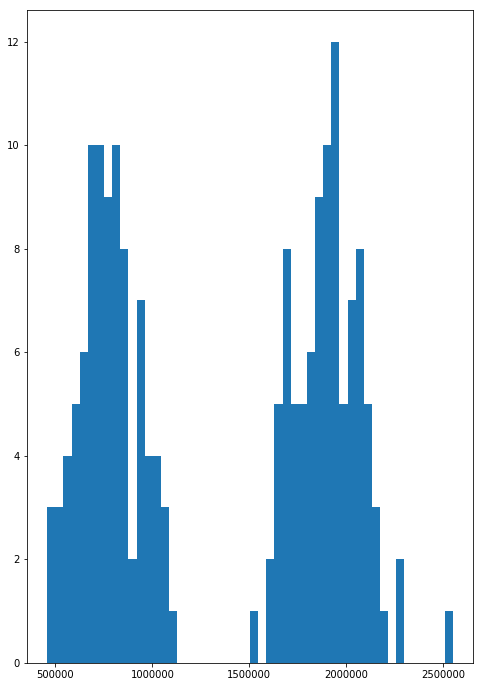

In [32]:
plt.hist(sums_base[3:], bins = 50)
plt.rcParams["figure.figsize"] = 8, 8
plt.show()

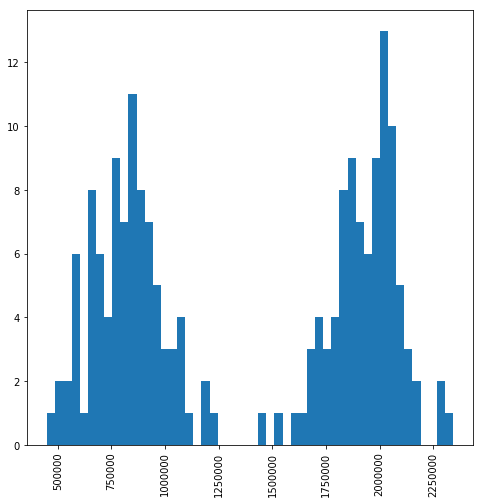

In [33]:
plt.hist(sums_met[3:], bins = 50)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
sum_n_b = np.round(GeneExpression_Baseline_normalized.sum(axis=0, numeric_only = True))

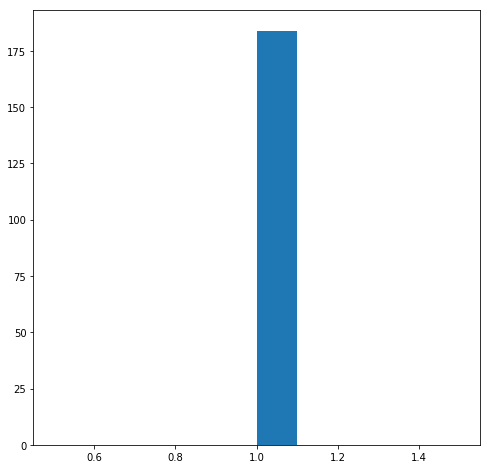

In [35]:
plt.hist(sum_n_b[3:])
#plt.xticks(rotation='vertical')
plt.show()

**Use the normalized gene expression matrices for the following analyses.**

Other normalization techniques include subtracting the mean, taking the z-score, etc. One should choose the normalize technique carefully based on one’s understanding of the domain and the nature of the analyses.

**3. Visual Inspection**

a. Heatmap is a visual representation where individual values contained in a ​matrix​ are represented as colors. Plot heatmaps of the gene expression matrices. You’re expected to plot two heatmaps - one for baseline cells, and one for metformin-treated cells. The heatmaps should have genes as rows and cells as columns. Briefly summarize your observations. (Hint: Make use of the ​heatmap ​API in the ​seaborn p​ ackage; save your plot to a local file because plotting in Jupyter Notebook is sometimes inaccurate.)

In [36]:
scale_bs = pd.DataFrame(GeneExpression_Baseline_normalized.drop(["GeneID", "Chr", "Start", "Stop", "CodingLength"], axis=1))
scale_metf = pd.DataFrame(GeneExpression_Metformin_normalized.drop(["GeneID", "Chr", "Start", "Stop", "CodingLength"], axis=1))

In [37]:
scale_bs["GeneID"] = GeneExpression_Baseline_normalized["GeneID"].values
scale_bs = scale_bs.set_index("GeneID")
scale_bs.head()

,BaselineCell_1,BaselineCell_2,BaselineCell_3,BaselineCell_4,BaselineCell_5,BaselineCell_6,BaselineCell_7,BaselineCell_8,BaselineCell_9,BaselineCell_10,...,BaselineCell_175,BaselineCell_176,BaselineCell_177,BaselineCell_178,BaselineCell_179,BaselineCell_180,BaselineCell_181,BaselineCell_182,BaselineCell_183,BaselineCell_184
GeneID,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.000034,0.000023,0.000035,0.000038,0.000040,0.000046,0.000039,0.000030,0.000034,0.000055,...,0.000048,0.000046,0.000042,0.000044,0.000053,0.000044,0.000033,0.000044,0.000049,0.000033
WASH7P,0.000040,0.000029,0.000038,0.000040,0.000043,0.000043,0.000051,0.000046,0.000043,0.000044,...,0.000023,0.000039,0.000037,0.000037,0.000029,0.000031,0.000028,0.000047,0.000033,0.000025
FAM138A,0.000088,0.000088,0.000074,0.000066,0.000078,0.000074,0.000061,0.000083,0.000066,0.000073,...,0.000076,0.000045,0.000084,0.000074,0.000068,0.000065,0.000054,0.000050,0.000075,0.000062
FAM138F,0.000035,0.000026,0.000043,0.000046,0.000034,0.000037,0.000043,0.000038,0.000048,0.000045,...,0.000042,0.000049,0.000043,0.000037,0.000033,0.000050,0.000042,0.000044,0.000030,0.000030
OR4F5,0.000034,0.000028,0.000031,0.000030,0.000037,0.000038,0.000046,0.000049,0.000035,0.000033,...,0.000030,0.000051,0.000035,0.000042,0.000036,0.000044,0.000044,0.000040,0.000051,0.000040


In [38]:
scale_metf["GeneID"] = GeneExpression_Metformin_normalized["GeneID"].values
scale_metf = scale_metf.set_index("GeneID")
scale_metf.head()

,MetforminCell_1,MetforminCell_2,MetforminCell_3,MetforminCell_4,MetforminCell_5,MetforminCell_6,MetforminCell_7,MetforminCell_8,MetforminCell_9,MetforminCell_10,...,MetforminCell_175,MetforminCell_176,MetforminCell_177,MetforminCell_178,MetforminCell_179,MetforminCell_180,MetforminCell_181,MetforminCell_182,MetforminCell_183,MetforminCell_184
GeneID,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.000022,0.000043,0.000035,0.000049,0.000054,0.000026,0.000044,0.000031,0.000053,0.000054,...,0.000031,0.000034,0.000059,0.000036,0.000041,0.000041,0.000035,0.000035,0.000043,0.000057
WASH7P,0.000046,0.000043,0.000054,0.000034,0.000038,0.000032,0.000037,0.000043,0.000041,0.000049,...,0.000038,0.000040,0.000043,0.000047,0.000038,0.000026,0.000035,0.000043,0.000035,0.000043
FAM138A,0.000078,0.000062,0.000070,0.000077,0.000080,0.000065,0.000073,0.000074,0.000072,0.000095,...,0.000064,0.000071,0.000088,0.000064,0.000082,0.000076,0.000088,0.000100,0.000056,0.000057
FAM138F,0.000041,0.000035,0.000043,0.000044,0.000029,0.000051,0.000039,0.000042,0.000037,0.000035,...,0.000038,0.000034,0.000037,0.000053,0.000052,0.000034,0.000038,0.000054,0.000032,0.000054
OR4F5,0.000046,0.000049,0.000037,0.000043,0.000040,0.000037,0.000032,0.000038,0.000038,0.000034,...,0.000023,0.000043,0.000040,0.000038,0.000030,0.000040,0.000037,0.000043,0.000029,0.000032


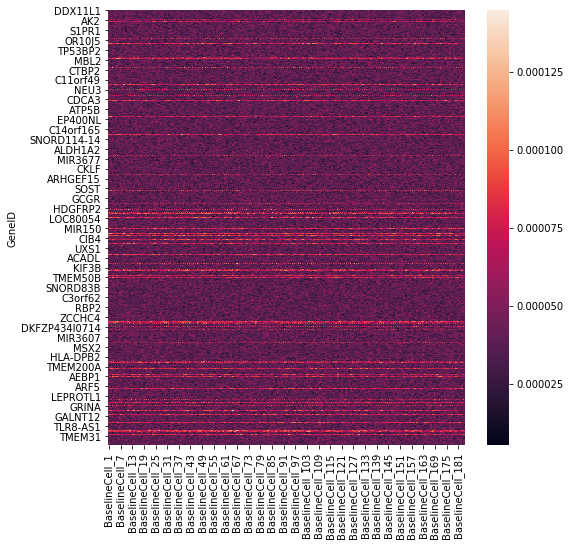

In [39]:
sns.heatmap(scale_bs, cbar='BuPu')

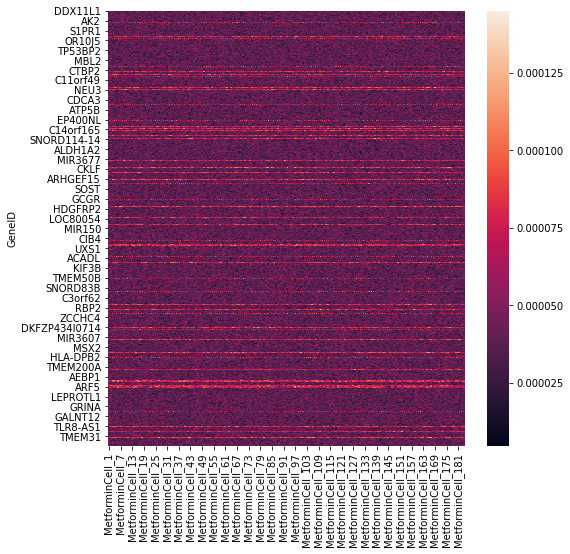

In [40]:
sns.heatmap(scale_metf, cbar='BuPu')

**b. Plot the distribution of gene expression across all cells for KCND2, TMEM239, and LINC00336, separately. Baseline cells and metformin-treated cells should be considered separately. (In total you’re expected to plot 6 distributions which can be plotted in the same graph if you choose.) Briefly summarize your observations.**

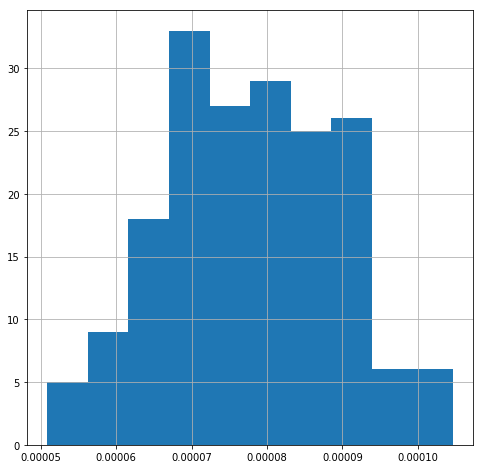

In [41]:
scale_bs.loc["KCND2"].hist()

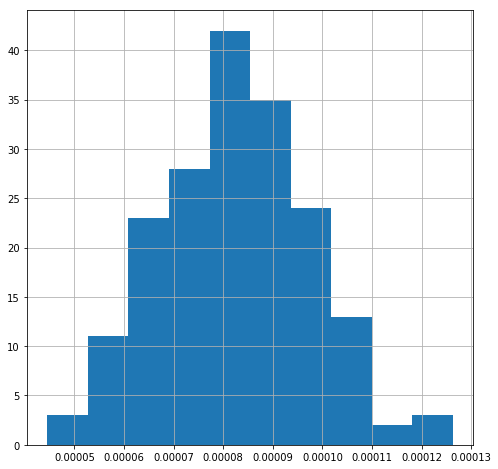

In [42]:
scale_bs.loc["TMEM239"].hist()

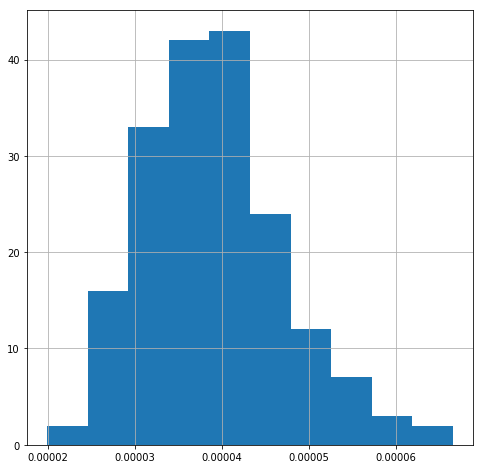

In [43]:
scale_bs.loc["LINC00336"].hist()

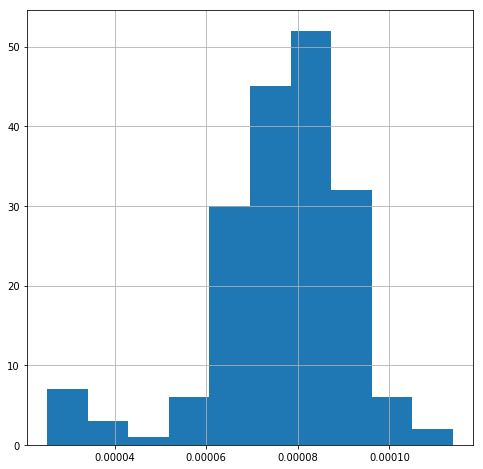

In [44]:
scale_metf.loc["KCND2"].hist()

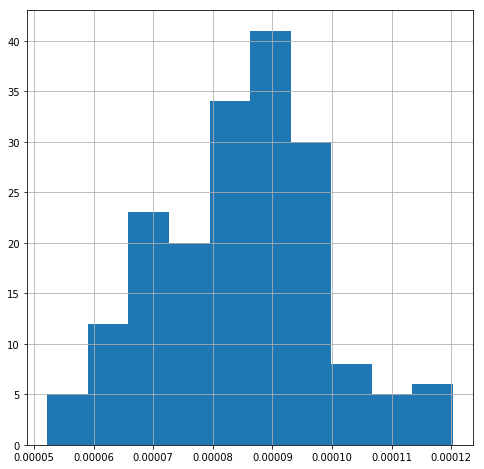

In [45]:
scale_metf.loc["TMEM239"].hist()

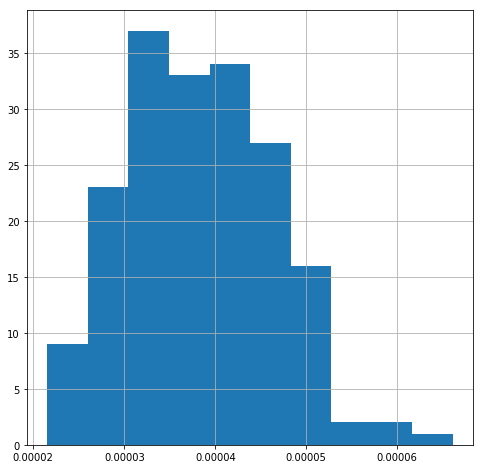

In [46]:
scale_metf.loc["LINC00336"].hist()

**c. Plot the distribution of gene expression across all genes for BaselineCell_1, BaselineCell_2, MetforminCell_3, and MetforminCell_6, separately. (In total you’re expected to draw 4 distributions which can be plotted in the same graph if you choose.) By visual inspection, do these distributions fit a Gaussian distribution?**

In [47]:
temp_base_cell1 = GeneExpression_Baseline_normalized["BaselineCell_1"]
temp_base_cell2 = GeneExpression_Baseline_normalized["BaselineCell_2"]
temp_met_cell3 = GeneExpression_Metformin_normalized["MetforminCell_3"]
temp_met_cell6 = GeneExpression_Metformin_normalized["MetforminCell_6"]

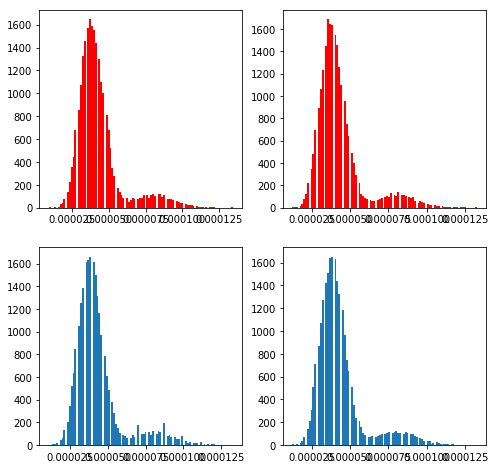

In [48]:
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(temp_base_cell1,bins=100, color='r')
axs[0,1].hist(temp_base_cell2,bins=100, color='r')
axs[1,0].hist(temp_met_cell3,bins=100)
axs[1,1].hist(temp_met_cell6,bins=100)
plt.show()
plt.rcParams["figure.figsize"] = 16, 14

These distributions are approximately Gaussian (there exists a minor hump on the right).

**Task 2: Statistical Analysis**

Recall that the biologists wish to identify genes with significantly altered expression induced by metformin. A gene’s expression is declared ​altered ​if the difference observed in its expression level between baseline cells and metformin-treated cells is statistically significant.

**1. Kolmogorov–Smirnov (KS) Test**

**a. Is KS test a parametric test or a non-parametric test? When does one want to use non-parametric tests?**

KS test is **non-parametric**.

One uses non-parametric distributions when there is a lack of clarity on the assumptions. Therefore, non-parametric tests use less assumptions.

**b. For each gene, find the p-value of a two-sample KS test on its expression across baseline cells vs. metformin-treated cells. In total you’re expected to find ~20,000 p-values. (Hint: Make use of the ​stats.ks_2samp ​API in the ​scipy p​ ackage.)**

In [49]:
KS_table = np.empty((GeneExpression_Baseline_normalized.shape[0], 2))

In [50]:
i = 0
for each_row in GeneExpression_Baseline_normalized.iterrows():
    D, p = sp.stats.ks_2samp(GeneExpression_Baseline_normalized.iloc[i,5:],GeneExpression_Metformin_normalized.iloc[i,5:])
    KS_table[i][0] = float(D)
    KS_table[i][1] = float(p)
    i += 1

In [51]:
KS_table

array([[0.05978261, 0.88806428],
       [0.08695652, 0.47219678],
       [0.11956522, 0.13396311],
       ...,
       [0.10326087, 0.26571642],
       [0.04891304, 0.97745567],
       [0.07608696, 0.64435091]])

**c. What is the null hypothesis of the KS test in our context? Take one gene as an example.**

Null Hypothesis: The values of gene expression before Metformin treatment equals the gene expression after Metformin treatment.
    
For example, the gene expression values of LINC00336 for the 184 cells remains roughly the same before and after Metformin treatment.

**d. Count the number of genes with significantly altered expression at alpha=0.1, 0.05, 0.01,
0.005 and 0.001 level? Summarize your answers in a table.**

In [52]:
alpha = np.empty((5,2))

In [53]:
alpha[0][0] = 0.1
alpha[1][0] = 0.05
alpha[2][0] = 0.01
alpha[3][0] = 0.005
alpha[4][0] = 0.001

In [54]:
for i in range(5):
    count = 0
    for j in KS_table:
        if j[1] < alpha[i][0]:
            count += 1
    alpha[i][1] = count

In [55]:
for i in range(5):
    print(str(alpha[i][0]) + '\t' + str(int(alpha[i][1])))

0.1	2301
0.05	1385
0.01	325
0.005	170
0.001	42


**2. Multiple Testing**

**a. P-value of 0.05 is generally considered a good threshold for significant discovery. What does a p-value of 0.05 represent in our context?**

A p-value of 0.05 indicates that we are 95% confident that there has been change in the gene expressions after treatment with Metformin.

**b. Based on the definition of p-value, if the null hypothesis is true, what distribution will the p-values follow? (Hint: Google the definition of p-value.)**

Uniform distribution.

In [56]:
p_list = []
for each_row in KS_table:
    p_list.append(each_row[1])

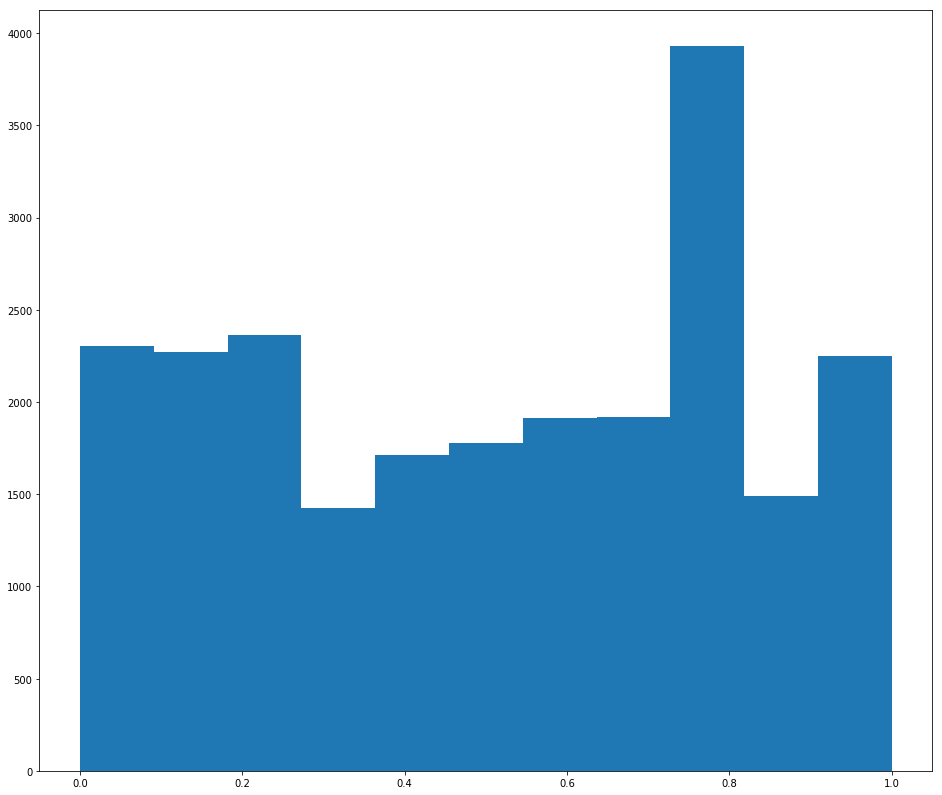

In [57]:
plt.hist(p_list,bins=11)
plt.show()
plt.rcParams["figure.figsize"] = 6, 6

**c. If no gene’s expression was altered, how many significant p-values does one expect to see at alpha=0.1, 0.05, 0.01, 0.005 and 0.001 level? Compare your answers with your results in Task 2.1.d. Show the comparison in a table.**

In [58]:
m = GeneExpression_Baseline_normalized.shape[0]
under_null = [0.1*m, 0.05*m, 0.01*m, 0.005*m, 0.001*m]

In [59]:
print("Signif level\tActual\t    Expected under H0")
for i in range(5):
    print(str(alpha[i][0]) + '\t\t' + str(int(alpha[i][1])) + '\t\t' + str(int(under_null[i])))

Signif level	Actual	    Expected under H0
0.1		2301		2334
0.05		1385		1167
0.01		325		233
0.005		170		116
0.001		42		23


**d. Q-Q (quantile-quantile) plot is used to compare two probability distributions by plotting their quantiles against each other. Say you’ve performed N KS tests in Task 2.1.b. Following the procedure below, plot a Q-Q plot to compare the distribution of p-values of your statistical tests (Task 2.1.b., referred to as observed p-values) with the distribution of p-values when the null hypothesis is true (Task 2.2.b.):**

i. Sample N p-values from the expected distribution in Task 2.2.b (referred to as expected p-values).

ii. Take the -log10() of observed p-values and expected p-values.

iii. Rank observed p-values and expected p-values in ascending order separately.

iv. Take the pair of smallest p-values (one from observed p-values, one from
expected p-values) and plot a point on an x-y plot with the observed p-value on
the Y-axis and the expected p-value on the X-axis.

v. Repeat (iv) for the next smallest pair, for the next smallest, and so on until you
have plotted all N pairs in order.

vi. Add the x=y line to your plot.

In [60]:
rand_vals = np.random.uniform(0,1,m)

rand_vals = -1*np.log10(rand_vals)

rand_vals

array([0.5652836 , 0.17732575, 0.24083444, ..., 0.3907396 , 0.09863418,
       0.36093349])

In [61]:
actual_vals = KS_table[:,1].copy()

actual_vals = -1*np.log10(actual_vals)

actual_vals

array([0.0515556 , 0.32587698, 0.87301478, ..., 0.5755816 , 0.00990293,
       0.19087756])

In [62]:
rand_vals = np.sort(rand_vals)
actual_vals = np.sort(actual_vals)

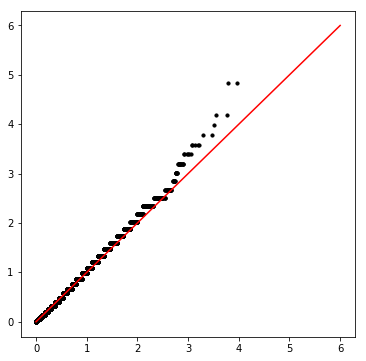

In [63]:
plt.scatter(rand_vals, actual_vals, s=10, color='k')
x=[0,1,2,3,4,5,6]
y=[0,1,2,3,4,5,6]
plt.plot(x,y,color='r')
plt.rcParams["figure.figsize"] = 8, 8
plt.show()

**e. Answer the following questions:**

**i. How does taking the -log10() of the p-values help you visualize the “tail” of the
p-value distribution?**

The log opertaions properly spaces out the p-values at the tails which helps in visualization.

**ii. What can you conclude from the Q-Q plot? (Hint: Think about what it means if the
Q-Q plot approximately aligns with the x=y line and what it implies about the null hypothesis.)**

We conclude that there is **no signifact** evidence that there was any change in the gene expressions after treatment with Metformin.

## Task 3: Dimensionality Reduction and Clustering

In [64]:
scale_bs.head()

,BaselineCell_1,BaselineCell_2,BaselineCell_3,BaselineCell_4,BaselineCell_5,BaselineCell_6,BaselineCell_7,BaselineCell_8,BaselineCell_9,BaselineCell_10,...,BaselineCell_175,BaselineCell_176,BaselineCell_177,BaselineCell_178,BaselineCell_179,BaselineCell_180,BaselineCell_181,BaselineCell_182,BaselineCell_183,BaselineCell_184
GeneID,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.000034,0.000023,0.000035,0.000038,0.000040,0.000046,0.000039,0.000030,0.000034,0.000055,...,0.000048,0.000046,0.000042,0.000044,0.000053,0.000044,0.000033,0.000044,0.000049,0.000033
WASH7P,0.000040,0.000029,0.000038,0.000040,0.000043,0.000043,0.000051,0.000046,0.000043,0.000044,...,0.000023,0.000039,0.000037,0.000037,0.000029,0.000031,0.000028,0.000047,0.000033,0.000025
FAM138A,0.000088,0.000088,0.000074,0.000066,0.000078,0.000074,0.000061,0.000083,0.000066,0.000073,...,0.000076,0.000045,0.000084,0.000074,0.000068,0.000065,0.000054,0.000050,0.000075,0.000062
FAM138F,0.000035,0.000026,0.000043,0.000046,0.000034,0.000037,0.000043,0.000038,0.000048,0.000045,...,0.000042,0.000049,0.000043,0.000037,0.000033,0.000050,0.000042,0.000044,0.000030,0.000030
OR4F5,0.000034,0.000028,0.000031,0.000030,0.000037,0.000038,0.000046,0.000049,0.000035,0.000033,...,0.000030,0.000051,0.000035,0.000042,0.000036,0.000044,0.000044,0.000040,0.000051,0.000040


In [65]:
scale_metf.head()

,MetforminCell_1,MetforminCell_2,MetforminCell_3,MetforminCell_4,MetforminCell_5,MetforminCell_6,MetforminCell_7,MetforminCell_8,MetforminCell_9,MetforminCell_10,...,MetforminCell_175,MetforminCell_176,MetforminCell_177,MetforminCell_178,MetforminCell_179,MetforminCell_180,MetforminCell_181,MetforminCell_182,MetforminCell_183,MetforminCell_184
GeneID,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.000022,0.000043,0.000035,0.000049,0.000054,0.000026,0.000044,0.000031,0.000053,0.000054,...,0.000031,0.000034,0.000059,0.000036,0.000041,0.000041,0.000035,0.000035,0.000043,0.000057
WASH7P,0.000046,0.000043,0.000054,0.000034,0.000038,0.000032,0.000037,0.000043,0.000041,0.000049,...,0.000038,0.000040,0.000043,0.000047,0.000038,0.000026,0.000035,0.000043,0.000035,0.000043
FAM138A,0.000078,0.000062,0.000070,0.000077,0.000080,0.000065,0.000073,0.000074,0.000072,0.000095,...,0.000064,0.000071,0.000088,0.000064,0.000082,0.000076,0.000088,0.000100,0.000056,0.000057
FAM138F,0.000041,0.000035,0.000043,0.000044,0.000029,0.000051,0.000039,0.000042,0.000037,0.000035,...,0.000038,0.000034,0.000037,0.000053,0.000052,0.000034,0.000038,0.000054,0.000032,0.000054
OR4F5,0.000046,0.000049,0.000037,0.000043,0.000040,0.000037,0.000032,0.000038,0.000038,0.000034,...,0.000023,0.000043,0.000040,0.000038,0.000030,0.000040,0.000037,0.000043,0.000029,0.000032


In [66]:
#Transpose for PCA
norm_bs_tpose = scale_bs.transpose()
norm_bs_tpose.head()

norm_metf_tpose = scale_metf.transpose()
norm_metf_tpose.head()

GeneID,DDX11L1,WASH7P,FAM138A,FAM138F,OR4F5,LOC729737,LOC100132287,LOC100132062,LOC100133331,OR4F29,...,DAZ4,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
MetforminCell_1,0.000022,0.000046,0.000078,0.000041,0.000046,0.000041,0.000046,0.000043,0.000046,0.000049,...,0.000040,0.000033,0.000035,0.000041,0.000041,0.000048,0.000041,0.000027,0.000025,0.000035
MetforminCell_2,0.000043,0.000043,0.000062,0.000035,0.000049,0.000060,0.000046,0.000043,0.000060,0.000043,...,0.000051,0.000033,0.000038,0.000040,0.000035,0.000048,0.000043,0.000038,0.000037,0.000048
MetforminCell_3,0.000035,0.000054,0.000070,0.000043,0.000037,0.000090,0.000043,0.000032,0.000035,0.000058,...,0.000045,0.000038,0.000025,0.000052,0.000037,0.000037,0.000040,0.000037,0.000043,0.000035
MetforminCell_4,0.000049,0.000034,0.000077,0.000044,0.000043,0.000063,0.000038,0.000044,0.000037,0.000032,...,0.000031,0.000031,0.000048,0.000037,0.000031,0.000040,0.000040,0.000029,0.000044,0.000034
MetforminCell_5,0.000054,0.000038,0.000080,0.000029,0.000040,0.000088,0.000031,0.000040,0.000017,0.000046,...,0.000040,0.000029,0.000028,0.000048,0.000026,0.000042,0.000046,0.000038,0.000026,0.000034


In [67]:
from sklearn.decomposition import PCA

X_bs = norm_bs_tpose.values
X_metf = norm_metf_tpose.values

X_metf

array([[2.20383125e-05, 4.62804563e-05, 7.82360094e-05, ...,
        2.69969328e-05, 2.53440594e-05, 3.47103422e-05],
       [4.29643573e-05, 4.29643573e-05, 6.18686746e-05, ...,
        3.78086345e-05, 3.66629183e-05, 4.75472221e-05],
       [3.52360482e-05, 5.42825607e-05, 7.04720964e-05, ...,
        3.71406994e-05, 4.28546532e-05, 3.52360482e-05],
       ...,
       [3.52619040e-05, 4.29275353e-05, 9.96532068e-05, ...,
        4.59937878e-05, 3.21956514e-05, 4.59937878e-05],
       [4.30689815e-05, 3.47665272e-05, 5.55226628e-05, ...,
        3.16531069e-05, 4.09933679e-05, 2.54262662e-05],
       [5.74530890e-05, 4.29604179e-05, 5.74530890e-05, ...,
        3.98548455e-05, 3.31261054e-05, 4.91715627e-05]])

In [131]:
#For baseline cells
pca = PCA(svd_solver='full') 
proj_bs = pca.fit_transform(X_bs)
print(X_bs.shape)
print(proj_bs.shape)

(184, 23346)
(184, 184)


In [132]:
comp = pca.components_
len(comp)

184

In [133]:
eigvals_ratio = pca.explained_variance_ratio_
eigvals_ratio

array([5.71968281e-02, 6.16743917e-03, 6.14912820e-03, 6.11814586e-03,
       6.09450933e-03, 6.07012032e-03, 6.04763250e-03, 6.01234243e-03,
       5.99908117e-03, 5.99300986e-03, 5.96791487e-03, 5.95496237e-03,
       5.94961839e-03, 5.92807651e-03, 5.91839109e-03, 5.90304922e-03,
       5.89690814e-03, 5.87750367e-03, 5.87186804e-03, 5.86571611e-03,
       5.84997341e-03, 5.83560760e-03, 5.82562035e-03, 5.80961067e-03,
       5.79272573e-03, 5.79042505e-03, 5.77786680e-03, 5.76937067e-03,
       5.75553479e-03, 5.74195720e-03, 5.73481329e-03, 5.73445710e-03,
       5.72342279e-03, 5.71305803e-03, 5.69805008e-03, 5.68636995e-03,
       5.67626777e-03, 5.67071174e-03, 5.65847460e-03, 5.64799859e-03,
       5.63988670e-03, 5.61600059e-03, 5.61147307e-03, 5.60685187e-03,
       5.59692262e-03, 5.58752395e-03, 5.57852678e-03, 5.57558018e-03,
       5.56014324e-03, 5.54432281e-03, 5.53634889e-03, 5.52110524e-03,
       5.51414651e-03, 5.50889809e-03, 5.48763435e-03, 5.48398371e-03,
      

In [134]:
eigvals = pca.explained_variance_
eigvals

array([1.02496391e-07, 1.10520160e-08, 1.10192028e-08, 1.09636827e-08,
       1.09213261e-08, 1.08776212e-08, 1.08373231e-08, 1.07740835e-08,
       1.07503194e-08, 1.07394397e-08, 1.06944696e-08, 1.06712588e-08,
       1.06616824e-08, 1.06230795e-08, 1.06057233e-08, 1.05782307e-08,
       1.05672259e-08, 1.05324532e-08, 1.05223542e-08, 1.05113300e-08,
       1.04831192e-08, 1.04573757e-08, 1.04394786e-08, 1.04107894e-08,
       1.03805316e-08, 1.03764088e-08, 1.03539045e-08, 1.03386795e-08,
       1.03138857e-08, 1.02895547e-08, 1.02767529e-08, 1.02761146e-08,
       1.02563412e-08, 1.02377676e-08, 1.02108734e-08, 1.01899427e-08,
       1.01718396e-08, 1.01618833e-08, 1.01399544e-08, 1.01211814e-08,
       1.01066450e-08, 1.00638412e-08, 1.00557279e-08, 1.00474467e-08,
       1.00296536e-08, 1.00128112e-08, 9.99668834e-09, 9.99140805e-09,
       9.96374514e-09, 9.93539501e-09, 9.92110580e-09, 9.89378927e-09,
       9.88131926e-09, 9.87191412e-09, 9.83380963e-09, 9.82726769e-09,
      

Text(0, 0.5, 'Eigenvalue')

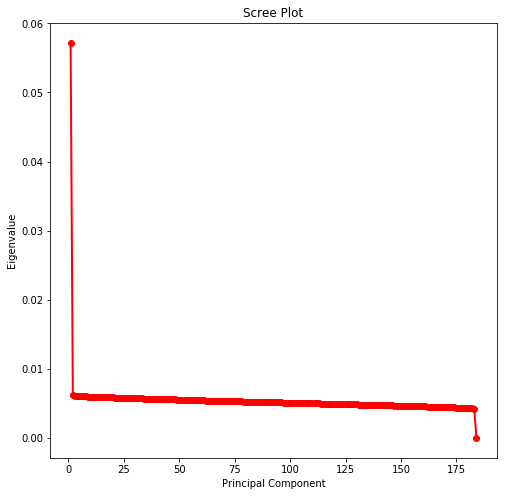

In [135]:
sing_vals = np.arange(len(comp)) + 1

plt.plot(sing_vals, eigvals_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#plt.ylim(0, 0.008)

(-0.00075, 0.00075)

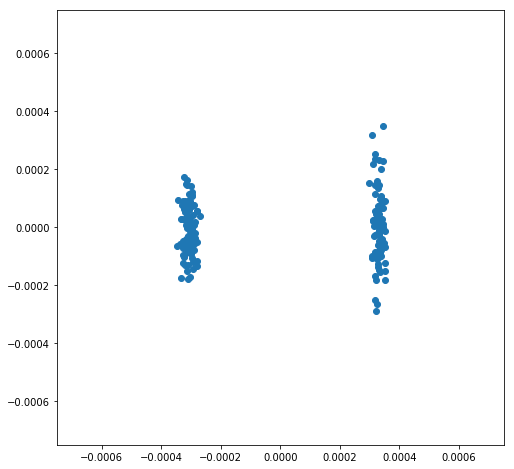

In [137]:
plt.scatter(proj_bs[:, 0],proj_bs[:, 1])
plt.xlim(-0.00075,0.00075)
plt.ylim(-0.00075, 0.00075)

In [68]:
#For metf
pca = PCA(svd_solver='full') 
proj_metf = pca.fit_transform(X_metf)
print(X_metf.shape)
print(proj_metf.shape)

(184, 23346)
(184, 184)


In [69]:
comp = pca.components_
len(comp)

184

In [70]:
eigvals_ratio = pca.explained_variance_ratio_
eigvals_ratio

array([5.52112579e-02, 8.14843573e-03, 6.15905513e-03, 6.13629740e-03,
       6.12115543e-03, 6.09573597e-03, 6.08210315e-03, 6.07456551e-03,
       6.05635416e-03, 6.03350649e-03, 6.01125307e-03, 5.98400935e-03,
       5.96916950e-03, 5.95739202e-03, 5.93742607e-03, 5.92562299e-03,
       5.89513217e-03, 5.88543287e-03, 5.87815476e-03, 5.86348601e-03,
       5.85524750e-03, 5.84173791e-03, 5.83277482e-03, 5.83053243e-03,
       5.81920426e-03, 5.81636582e-03, 5.79359706e-03, 5.77582502e-03,
       5.77057354e-03, 5.75229701e-03, 5.73416500e-03, 5.71562179e-03,
       5.70442658e-03, 5.69714817e-03, 5.69146431e-03, 5.67938344e-03,
       5.66994556e-03, 5.66597902e-03, 5.65322826e-03, 5.64734815e-03,
       5.62777395e-03, 5.62147658e-03, 5.61557565e-03, 5.60622895e-03,
       5.60344557e-03, 5.58830113e-03, 5.57903867e-03, 5.57247529e-03,
       5.55866993e-03, 5.54851948e-03, 5.53810962e-03, 5.52933818e-03,
       5.52052954e-03, 5.51223495e-03, 5.50153850e-03, 5.49406595e-03,
      

In [71]:
eigvals = pca.explained_variance_
eigvals

array([9.86672709e-08, 1.45619561e-08, 1.10067617e-08, 1.09660917e-08,
       1.09390317e-08, 1.08936049e-08, 1.08692419e-08, 1.08557715e-08,
       1.08232263e-08, 1.07823955e-08, 1.07426267e-08, 1.06939399e-08,
       1.06674198e-08, 1.06463724e-08, 1.06106915e-08, 1.05895984e-08,
       1.05351087e-08, 1.05177752e-08, 1.05047686e-08, 1.04785543e-08,
       1.04638313e-08, 1.04396885e-08, 1.04236707e-08, 1.04196634e-08,
       1.03994190e-08, 1.03943464e-08, 1.03536567e-08, 1.03218965e-08,
       1.03125117e-08, 1.02798500e-08, 1.02474465e-08, 1.02143082e-08,
       1.01943014e-08, 1.01812942e-08, 1.01711367e-08, 1.01495471e-08,
       1.01326808e-08, 1.01255923e-08, 1.01028056e-08, 1.00922973e-08,
       1.00573165e-08, 1.00460626e-08, 1.00355171e-08, 1.00188138e-08,
       1.00138396e-08, 9.98677520e-09, 9.97022239e-09, 9.95849306e-09,
       9.93382171e-09, 9.91568197e-09, 9.89707866e-09, 9.88140333e-09,
       9.86566154e-09, 9.85083839e-09, 9.83172292e-09, 9.81836882e-09,
      

Text(0, 0.5, 'Eigenvalue')

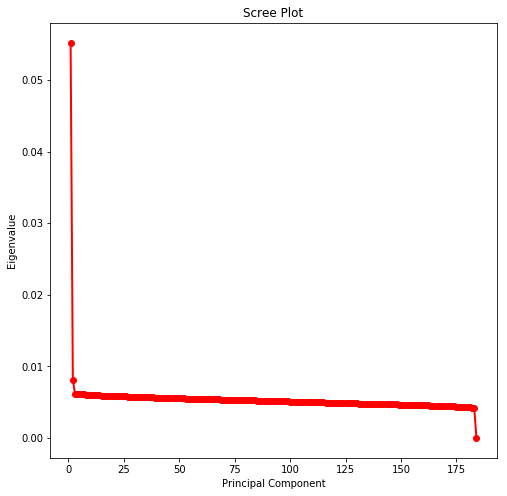

In [72]:
sing_vals = np.arange(len(comp)) + 1

plt.plot(sing_vals, eigvals_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#plt.ylim(0, 0.008)

In [73]:
tot_var = pca.explained_variance_.sum()

In [74]:
tot_var

1.7870860877853883e-06

/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(336.9714285714286, 0.5, 'component 2')

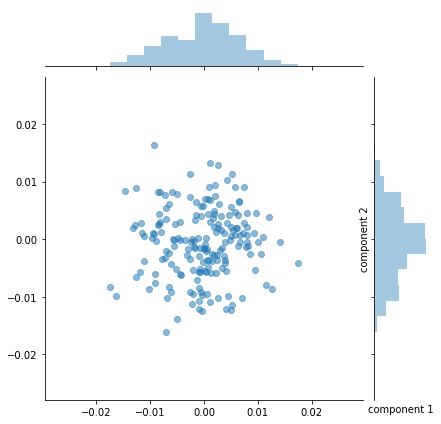

In [75]:
sns.jointplot(comp[:, 0], comp[:, 1], alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')


(-0.00075, 0.00075)

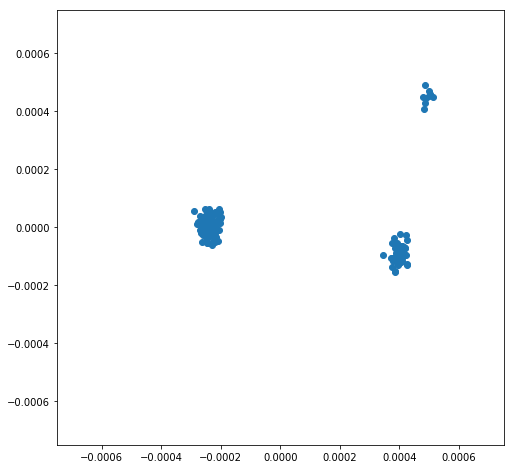

In [76]:
plt.scatter(proj_metf[:, 0],proj_metf[:, 1])
plt.xlim(-0.00075,0.00075)
plt.ylim(-0.00075, 0.00075)

## TSNE

In [139]:
#Tsne for baseline cells
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_bs = tsne.fit_transform(X_bs)


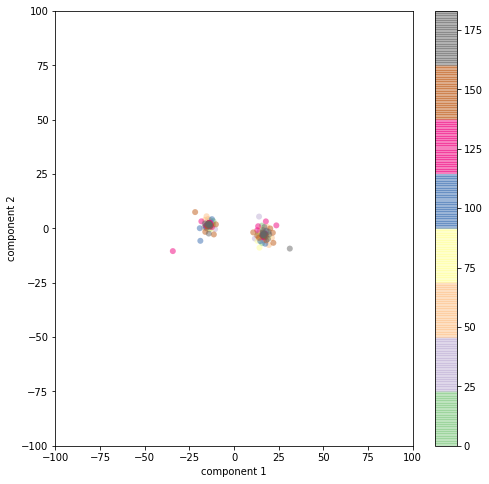

In [143]:
plt.scatter(tsne_bs[:, 0], tsne_bs[:, 1],
           c=range(len(norm_bs_tpose.index.values)), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 184))
plt.xlabel('component 1')

plt.ylabel('component 2')
plt.xlim(-100,100)
plt.ylim(-100, 100)
plt.colorbar();

In [144]:
#Tsne for metf
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_metf = tsne.fit_transform(X_metf)


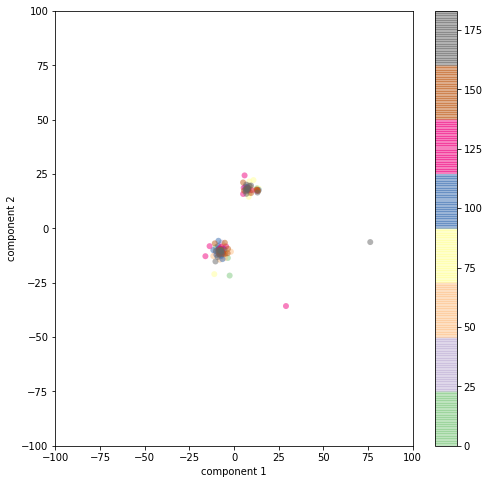

In [145]:
plt.scatter(tsne_metf[:, 0], tsne_metf[:, 1],
           c=range(len(norm_metf_tpose.index.values)), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 184))
plt.xlabel('component 1')

plt.ylabel('component 2')
plt.xlim(-100,100)
plt.ylim(-100, 100)
plt.colorbar();

## KMEANS

In [147]:
#Baseline cells
from sklearn.cluster import KMeans

norm_bs_tpose.index.values

array(['BaselineCell_1', 'BaselineCell_2', 'BaselineCell_3',
       'BaselineCell_4', 'BaselineCell_5', 'BaselineCell_6',
       'BaselineCell_7', 'BaselineCell_8', 'BaselineCell_9',
       'BaselineCell_10', 'BaselineCell_11', 'BaselineCell_12',
       'BaselineCell_13', 'BaselineCell_14', 'BaselineCell_15',
       'BaselineCell_16', 'BaselineCell_17', 'BaselineCell_18',
       'BaselineCell_19', 'BaselineCell_20', 'BaselineCell_21',
       'BaselineCell_22', 'BaselineCell_23', 'BaselineCell_24',
       'BaselineCell_25', 'BaselineCell_26', 'BaselineCell_27',
       'BaselineCell_28', 'BaselineCell_29', 'BaselineCell_30',
       'BaselineCell_31', 'BaselineCell_32', 'BaselineCell_33',
       'BaselineCell_34', 'BaselineCell_35', 'BaselineCell_36',
       'BaselineCell_37', 'BaselineCell_38', 'BaselineCell_39',
       'BaselineCell_40', 'BaselineCell_41', 'BaselineCell_42',
       'BaselineCell_43', 'BaselineCell_44', 'BaselineCell_45',
       'BaselineCell_46', 'BaselineCell_47', 'Bas

In [148]:
data = X_bs

model = KMeans(n_clusters=3)

kmod = model.fit(data)

In [149]:
y_kmeans = model.predict(data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

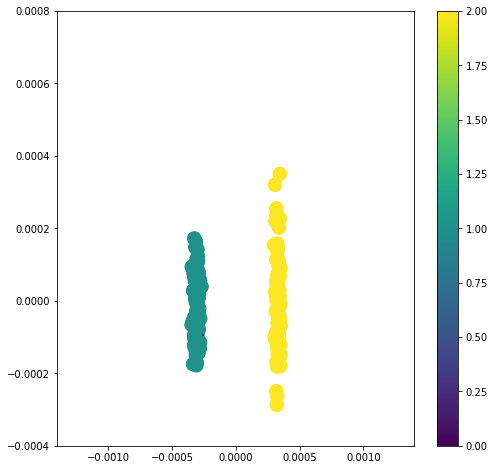

In [150]:
plt.scatter(proj_bs[:, 0], proj_bs[:, 1], c=y_kmeans, s=184, cmap='viridis')

centers = model.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlim(-0.0014,0.0014)
plt.ylim(-0.0004,0.0008)
plt.colorbar();


In [146]:
#Metf cells
from sklearn.cluster import KMeans

norm_metf_tpose.index.values

array(['MetforminCell_1', 'MetforminCell_2', 'MetforminCell_3',
       'MetforminCell_4', 'MetforminCell_5', 'MetforminCell_6',
       'MetforminCell_7', 'MetforminCell_8', 'MetforminCell_9',
       'MetforminCell_10', 'MetforminCell_11', 'MetforminCell_12',
       'MetforminCell_13', 'MetforminCell_14', 'MetforminCell_15',
       'MetforminCell_16', 'MetforminCell_17', 'MetforminCell_18',
       'MetforminCell_19', 'MetforminCell_20', 'MetforminCell_21',
       'MetforminCell_22', 'MetforminCell_23', 'MetforminCell_24',
       'MetforminCell_25', 'MetforminCell_26', 'MetforminCell_27',
       'MetforminCell_28', 'MetforminCell_29', 'MetforminCell_30',
       'MetforminCell_31', 'MetforminCell_32', 'MetforminCell_33',
       'MetforminCell_34', 'MetforminCell_35', 'MetforminCell_36',
       'MetforminCell_37', 'MetforminCell_38', 'MetforminCell_39',
       'MetforminCell_40', 'MetforminCell_41', 'MetforminCell_42',
       'MetforminCell_43', 'MetforminCell_44', 'MetforminCell_45',
    

In [83]:
data = X_metf

model = KMeans(n_clusters=3)

kmod = model.fit(data)

In [84]:
y_kmeans = model.predict(data)
y_kmeans

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2], dtype=int32)

In [85]:
kmod.labels_

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2], dtype=int32)

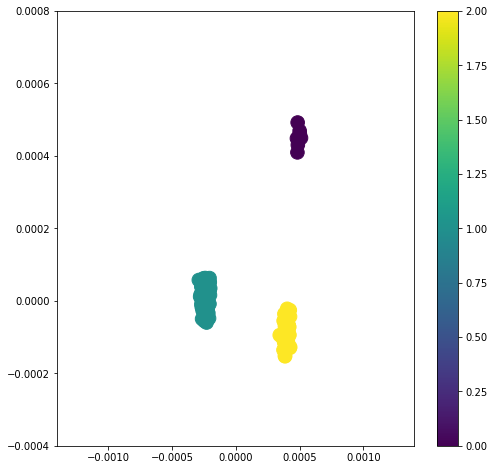

In [86]:
plt.scatter(proj_metf[:, 0], proj_metf[:, 1], c=y_kmeans, s=184, cmap='viridis')

centers = model.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlim(-0.0014,0.0014)
plt.ylim(-0.0004,0.0008)
plt.colorbar();


In [87]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

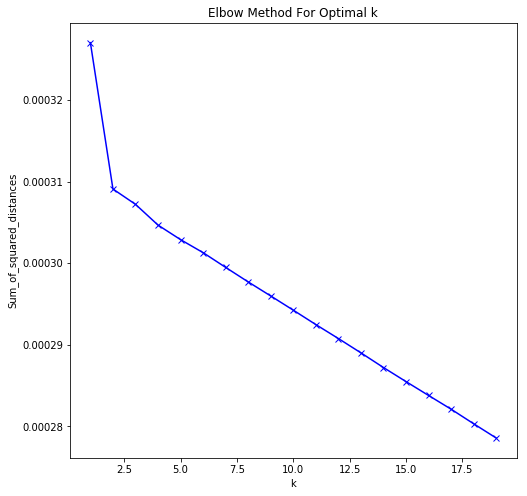

In [88]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## GMM

In [151]:
#Baseline cells
from sklearn.mixture import GaussianMixture


In [156]:
gmm = GaussianMixture(n_components=2).fit(proj_bs[:,:2]*1000)
labels = gmm.predict(proj_bs[:,:2]*1000)


In [157]:
labels

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0])

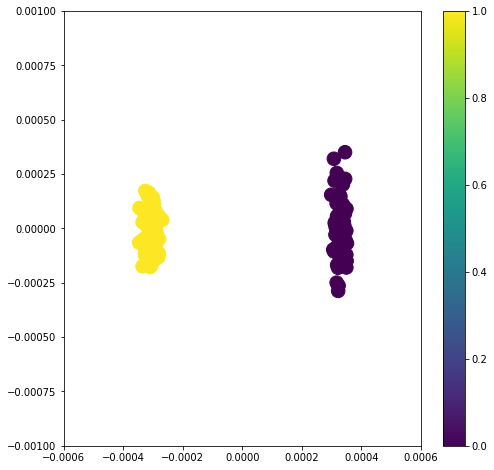

In [158]:
plt.scatter(proj_bs[:, 0], proj_bs[:, 1], c=labels, s=184, cmap='viridis')
plt.xlim(-0.0006,0.0006)
plt.ylim(-0.001, 0.001)
plt.colorbar()

In [100]:
#Metf cells
from sklearn.mixture import GaussianMixture


In [127]:
gmm = GaussianMixture(n_components=3).fit(proj_metf[:,:2]*1000)
labels = gmm.predict(proj_metf[:,:2]*1000)


In [128]:
labels

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1])

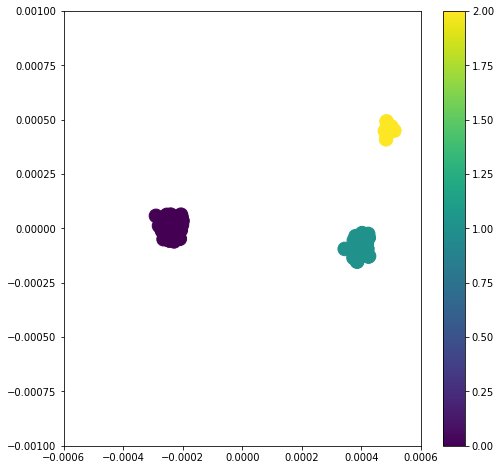

In [129]:
plt.scatter(proj_metf[:, 0], proj_metf[:, 1], c=labels, s=184, cmap='viridis')
plt.xlim(-0.0006,0.0006)
plt.ylim(-0.001, 0.001)
plt.colorbar()